   # Learning the topology of a bayesian network  from a database of cases using the K2 algorithm

### Advanced Statistics for Physical Analysis -  Physics of Data (UniPD)

Student: Ehsan Goudarzi

Student: Nguyen Xuan Tung - ID: 2005491

Student: Vivek Kashyap Janardhana




-----------------------------------------------------------------------------------------------------------------------------

## Theoretical background

--------------------------------------------------------------------------------------------------------------------------

A Bayesian belief-network structure $B_s$ is a directed acyclic graph in which nodes represent domain variables and arcs between nodes represent probabilistic dependencies. A variable in a Bayesian belief-network structure may be continuous or discrete. Since the algorithm we want to implement is designed to work with discrete variables, we shall focus our discussion on the latter case.

A Bayesian belief-network structure, $B_s$, is augmented by conditional probabilities, $B_p$,
to form a Bayesian belief network $B$. Thus, $B$ = ($B_s, B_p$). For brevity, we call $B$ a belief
network. For each node1 in a belief-network structure, there is a conditional-probability
function that relates this node to its immediate predecessors (parents). We shall use $T_i$, to
denote the parent nodes of variable $x_i$. If a node has no parents, then a prior-probability
function, $P(x_i)$, is specified.  We shall use $\pi_i$ to denote the parent nodes of variable $x_i$ .

BBNs are capable of representing the probabilities over any discrete sample space since the probability of any sample point in that space can be computed from the probabilities in the belief network. The key feature of BBNs is their explicit representation of the conditional independence and dependence among events. In particular, it has been proved that the joint probability of any particular instantiation of all $n$ variables in a BBN can be calculated as follows:

\begin{equation*}
 P(X_1, X_2, ..., X_n) = \prod_{i=1}^{n} P(X_i,\pi_i) 
\label{first_eq}\tag{1}
\end{equation*}

Where:

$X_i$ represents the instantiation of variable $x_i$

$\pi_i$ represents the instantiation of the parents of $x_i$ .

Let us now consider the problem of finding the most probable belief-network structure $B_s$. Let $D$ be a database of cases, $Z$ be the set of variables represented by $D$, and $B_{s_i}$ and
$B_{s_j}$ be two belief-network structures containing exactly those variables that are in $Z$. In this
section, we develop a method for computing $ \frac{P(B_{s_i}|D)}{P(B_{s_j}|D)} $. By computing such
ratios for pairs of belief-network structures, we can rank order a set of structures by their
posterior probabilities. To calculate the ratio of posterior probabilities, we shall calculate
$P(B_{s_i}, D)$ and $P(B_{s_j}, D)$ and use the following equivalence:

\begin{equation*}
\frac{P(B_{s_i}|D)}{P(B_{s_j}|D)} = \frac{\frac{P(B_{s_i},D)}{P(D)}}{\frac{P(B_{s_j},D)}{P(D)}} = \frac{P(B_{s_i},D)}{P(B_{s_j},D)}   
\label{}\tag{2}
\end{equation*}
 
 and we can compute $P(B_{s_i},D)$ instead of the conditional probabilities. 

We can get the $\textbf{Theorem}$: 

Let $Z$ be a set of n variables, where a variable $x_i$ in $Z$ has $r_i$ possible value assignments: $(v_{i_1},...,v_{i_{r_i}})$. Let $D$ be a database of m cases, where each case contains a value assignment for each variable in $Z$. Each variable $x_i$ in $B_s$ has a set of parents, which we represent with a list of variables $\pi _i$. Let $\omega_{ij}$ denote $j^{th}$ unique instantiation of $\pi_i$, relative to $D$. Suppose there are $q_i$ such unique instantiations of $\pi_i$. Define $N_{ijk}$ to be the number of cases in $D$ in which variable $x_i$ has the value $v_{ij}$ and $\pi_i$ is instantiated as $\omega_{ij}$. Let:

$$ N_{ij} = \sum_{k=1}^{r_i} N_{ijk}  $$

Suppose the following assumptions hold:

1. The database variables in $Z$ are discrete.
2. Cases occur independently, given a belief-network structure.
3. There are no cases that have variables with missing values.
4. Before observing $D$, we are indifferent regarding which numerical probabilities to assign to the belief network with structure $B_s$.

It follows that:

\begin{equation*}
 P(B_s,D) = P(B_s) \prod_{i=1}^{n} \prod_{j=1}^{q_i} \frac{(r_i-1)!}{(N_{ij}+r_i-1)!} \prod_{k=1}^{r_i} N_{ijk}!  
 \label{}\tag{3}
 \end{equation*}

The proof is reported in the appendix of G.F.Cooper and E. Herskovits , A Bayesian Method for the Induction of Probabilistic Networks from Data, Machine Learning  paper.

Firstly, to reduce the time complexity of the method Cooper and Herskovits introduced some additional assumptions and conditions to simplify the problem. The complexity of the task, however, remains exponential. Thus, the authors also realized a modified algorithm to construct a heuristic method with polynomial time complexity.

#### Exact method 

##### 1. Ordering of nodes

First of all let's assume, that we can specify an ordering on all $n$ variables such that, if $x_i$ precedes $x_j$ in the ordering, then we do not allow structures in which there is an arc from $x_j$ to $x_i$. Given such an ordering as a constraint, there remain $2^{\binom{n}{2}}= 2^{\frac{n(n-1)}{2}}$ possible $B_s$. For large $n$, it is still not feasible to apply equation (2) for each of them.

##### 2. Equal priors

In addition to a node ordering, the authors also assumed equal priors on $B_s$. That is, initially, before the observation of $D$, we assume that all structures are equally likely. In that case, we obtain:

\begin{equation*}
P(B_s,D) = c \prod_{i=1}^{n} \prod_{j=1}^{q_i} \frac{(r_i-1)!}{(N_{ij}+r_i-1)!} \prod_{k=1}^{r_i} N_{ijk}!  
\label{}\tag{4}
\end{equation*}

where c is the constant prior probability $P(B_s)$, for each $B_s$. Thus, to maximize equation (4), we need only to find the parent set of each variable that maximizes the second inner product.

\begin{equation*}
max_{B_s}[P(B_s,D)] = c \prod_{i=1}^{n} max_{\pi_i}\left[ \prod_{j=1}^{q_i} \frac{(r_i-1)!}{(N_{ij}+r_i-1)!} \prod_{k=1}^{r_i} N_{ijk}! \right] 
\label{}\tag{5}
\end{equation*}

##### 3. Upper limit on number of parents

Finally, to further improve the time complexity of computing eq.(5) one can assume that a node can have at most $u$ parents.

#### Euristic method: the K2 algorithm

Cooper and Herskovits  proposed one heuristic-search method, among many possibilities, for maximizing
$P(B_s, D)$: the $\textbf{K2 algorithm}$. We shall use eq.(5) as our starting point, with the attendant assumptions
that we have an ordering on the domain variables and that, a priori, all structures are considered equally likely. We shall modify the maximization operation on the right of equation (5) to use a greedy-search method. In particular, we use an algorithm that begins by making the assumption that a node has no parents, and then adds incrementally that parent
whose addition most increases the probability of the resulting structure. 

Starting from eq.(5) with all the assumptions mentioned so far, we can use the following function to quantify the probability of the database $D$ given that the parents of $x_i$ are $\pi_i$:

\begin{equation*}
g(i,\pi) = \prod_{j=1}^{q_i} \frac{(r_i-1)!}{(N_{ij}+r_i-1)!} \prod_{k=1}^{r_i} N_{ijk}!
\label{}\tag{6}
\end{equation*}

where the $N_{ijk}$ are computed relative to ribeing the parents of xiand relative to a database $D$, which we leave implicit.

The algorithm can be implemented as follows:

### --------------------------------------------------------------------------------------------------------------------------------------------------

## Implementation

### Load the library

In [1]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install(c("graph", "RBGL", "Rgraphviz"))
#install.packages("https://www.bnlearn.com/releases/bnlearn_latest.tar.gz", repos = NULL, type = "source")
#install.packages('bnstruct')
#install.packages('ggpubr')

In [2]:
library('bnstruct')
library('bnlearn')
library('Rcpp')
library('ggplot2')
library('ggpubr')
library('igraph')
library('intergraph')
library("Rgraphviz")
library('GGally')
library('sna')
library('purrr')
library('dplyr')
library('combinat')
library('plyr')
library('data.table')

Loading required package: bitops

Loading required package: igraph


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'bnlearn'


The following objects are masked from 'package:bnstruct':

    impute, read.bif, read.dsc, read.net, shd, write.dsc


The following objects are masked from 'package:igraph':

    as.igraph, compare, degree, subgraph


Loading required package: graph

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following object is masked from 'package:bnlearn':

    score


The following objects are masked from 'package:igraph':

    normalize, path, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplica

### Assistant function of K2 algorithm

-----------------------------------------------------------------------------------------------------------------------------

$\textbf{r function}:$ 

input: 
- Name of datatable storing the database

output: 
- Vector containing the cardinality of the set of all possible instantiations for each node.

r function takes as input the datatable containing our database $D$ and determines, for each node, the number of unique values assumed throughout all cases of the database $D$.


In [3]:
r <- function(df){
    return(rapply(df, function(x)length(unique(x))) %>% unname)
}

-------------------------------------------------------------------------------------------------------------------------

$\textbf{param function}:$

input: 

- df: Name of datatable storing the database
- par: string with the name of the parent of the considered node
- son: string with the name of the considered node
- flog: bool set to FALSE for the normal computation whereas TRUE is set to work with the logversion of the code

output: 

- alpha = $ \prod_{j=1}^{q_i} \prod_{k=1}^{r_i} N_{ijk}! $ 

- $ N_{ij} = \sum_{k=1}^{r_i} N_{ijk} $
 

param function takes as input the datatable containing the database $D$ and then, considering the parent-son pair given as input, it computes the frequency in $D$ of all possible instantiations. Then it computes and return alpha. It also performs calculation over the possible values of variables in node (k = 1,..., $r_i$ where $r_i$ is determined in function r, then it returin $N_{ij}$

In [4]:
params <- function(df, par, son, flog=TRUE){

    tmp  <- df[, c(par, son), with=FALSE] %>% table %>% as.data.frame
    if (!identical(par,NULL)) for (i in length(par):1) tmp <- tmp[order(tmp[, i]),]

    freq <- tmp %>% pull(Freq)

    r_i  <- r(df)[which(colnames(data)==son)]
    if (flog) alpha <- freq %>% lfactorial %>% sum else alpha <- freq %>% factorial %>% prod
    
    N_j  <- freq %>% matrix(, nrow = r_i) %>% colSums

    return(c(alpha, N_j))
}

---------------------------------------------------------------------------------------------------------------------------

$\textbf{f function}:$

input:
- par: Known parents of the node considered
- df: Name of datatable storing the database
- i: Index of considered node
- nod: List of all nodes of the network
- flog: bool set to FALSE for the normal computation whereas TRUE is set to work with the logversion of the code

output: 
- $g(i,\pi)$

f funnction computed the probability of the assumed connections for our node given the database $D$.







In [5]:
f <- function(par, df, i, nod, flog=TRUE){
    son   <- nod[i]
    aN    <- params(df, par, son, flog)
    alpha <- aN[1]
    Ns    <- aN[-1]
    r_i   <- r(df)[i]
    
    if (flog){
        num <- (lfactorial(r_i-1))*length(Ns)
        den <- lfactorial(Ns+r_i-1) %>% sum
        
        return(num - den + alpha)
    } else{
        num <- (factorial(r_i-1))^length(Ns)
        den <- factorial(Ns+r_i-1) %>% prod
        
        return(num*alpha/den) 
    }
}

--------------------------------------------------------------------------------------------------------------------------

### K2 algorithm

input: 
- nodes: Vector of all names of the nodes of the network
- level: Vector codifying the ordering of the nodes
- u: Upper limit for the number of possible parents of a node
- df: Name of datatable storing the dataset
- flog: bool set to FALSE for the normal computation and TRUE is set to work with the logversion of the code

output: 
- printout of all parents of each node of the network
- printout of the global score of the final network (determined by summing over all nodes the final values of $g(i,\pi)$ 
- adj: the resulting adjacency matrix

This function implements the K2 algorithm in a general way: the input network can have an arbitrary number of nodes, with no restrictions on the cardinality of the set of values the node can have. The function returns the adjacency matrix, which stores information about son-parents groups in a compact way as follows:

$$ adj_{ij} = \left\{ \begin{array}{rcl}
1 & \mbox{if $j^{th}$ node is a parent of $i^{th}$ node} 
\\ 0 & \mbox{otherwise}
\end{array}\right. $$

In [6]:
K2 <- function(nodes, level, u, df, flog=TRUE){
    n     <- length(nodes)
    score <- double(length(nodes))
    adj   <- matrix(0,nrow=n,ncol=n)
    rownames(adj) <- nodes; colnames(adj) <- nodes
    for (i in 1:n){
#         cat('Iteration:',i,'\n')
        p_i     <- NULL
        P_old   <- f(p_i, df, i, nodes, flog)
        proceed <- TRUE
        
        t <- data.table(cbind(level, nodes))
        
        while (proceed & length(p_i) < u){
            pred    <- t[t$level < t$level[i]] %>% pull(nodes)
            if (identical(pred, character(0)) | identical(pred, p_i)) break
            z_cand  <- pred[! pred %in% p_i]
            
            if (identical(p_i, NULL)){
                args    <- z_cand 
                fvalues <- map(args, f, df=data, i=i, nod=nodes, flog=flog) %>% unlist
            } else if (!identical(p_i, NULL) & length(z_cand)==1){
                args    <- map(z_cand, c, p_i) %>% unlist
                fvalues <- f(args, data, i, nodes, flog)
                args    <- list(args)
            } else{
                args    <- map(z_cand, c, p_i)
                fvalues <- map(args, f, df=data, i=i, nod=nodes, flog=flog) %>% unlist
            }
            
            P_new   <- fvalues %>% max
            par_new <- args[which(fvalues==P_new)] %>% unlist
            
            if (P_new > P_old){
                P_old      <- P_new
                p_i        <- par_new
            } else proceed <- FALSE      
        }
        
        score[i]   <- P_old
        adj[i,p_i] <- 1
        
        x_i <- t$nodes[i]
        if (identical(p_i, NULL)) printout <- 'Ø' else printout <- p_i
        
        cat('Node:\t',x_i,', Parents of:',x_i,'\t  :pi ',i,'=',printout,'\n')
    }
    
    return(adj)
}

----------------------------------------------------------------------------------------------------------------------------

In [7]:
plotGraph <- function(adj, size, ls, title){
    ggnet2(network(adj), size=size, label=TRUE, label.size=ls,node.color ='grey95',
           edge.lty = "solid",edge.size = 0.25,
           arrow.size=8, arrow.gap=0.05, mode = "fruchtermanreingold") + labs(title=title)
}

## Testing the performance of algorithm with dataset 

### Ruiz network

 The dataset is taken from the paper: C. Ruiz, Illustration of the K2 Algorithm for learning Bayes Net Structures, http://web.cs.wpi.edu/~cs539/s11/Projects/k2_algorithm.pdf 

This simple dataset only has three nodes: $x_1$, $x_2$, and $x_3$, and 10 cases. Each node can only assume two values:0 and 1, i.e the cardinality of every node is $r_1 = 2$. The ordering provided to the algorithm is ($x_1$, $x_2$, $x_3$).

The expected topology is:

$$x_1 \rightarrow x_2 \rightarrow x_3$$

In [8]:
data  <- data.table(matrix(c(1,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0), 10,3, byrow=TRUE))
nodes <- c('x1','x2','x3')
colnames(data) <- nodes

upbound <- 2
#r_i <- r(data)

data

x1,x2,x3
<dbl>,<dbl>,<dbl>
1,0,0
1,1,1
0,0,1
1,1,1
0,0,0
0,1,1
1,1,1
0,0,0
1,1,1


In [9]:
start.time <- Sys.time()
level <- c(1,2,3)
adj   <- K2(nodes, level, upbound, data)
end.time <- Sys.time()
cat("------------------------------------------------------------------------------------\n")
cat("K2 algorithm takes:",end.time - start.time,"sec \n")

Node:	 x1 , Parents of: x1 	  :pi  1 = Ø 
Node:	 x2 , Parents of: x2 	  :pi  2 = x1 
Node:	 x3 , Parents of: x3 	  :pi  3 = x2 
------------------------------------------------------------------------------------
K2 algorithm takes: 0.1645598 sec 


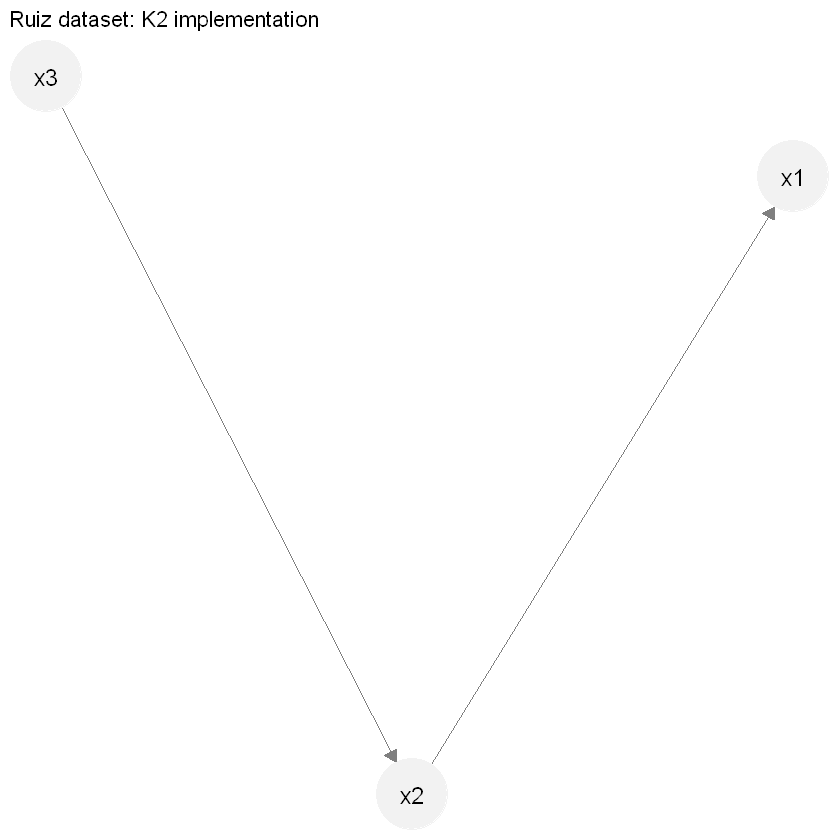

In [10]:
plotGraph(adj, 20, 5, title='Ruiz dataset: K2 implementation')

-----------------------------------------------------------------------------------------------------

### Small network in bnlearn: ASIA

All the network can be found in this link: https://www.bnlearn.com/bnrepository/. I have tried some other large network but none of them are working. I suppose only ASIA and CHILD networks are working. 

We analysis the toydataset Asia contained in bnstruct library. This dataset originally appeared in the paper Local Computations with Probabilities on Graphical Structures and Their Application to Expert Systems by S. L. Lauritzen and D. J. Spiegelhalter (1988) and it addresses the following scenario. 

It investigates possible correlations among the following:
- Asia: recent visit to Asia
- Tub: tuberculosis
- Smoke: smoking
- LungCan: lung cancer
- Bronch: bronchitis
- Either: either lung cancer or bronchitis
- X-ray: chest X-ray
- Dysp: Shortness-of-breath (dyspnoea)



The number of nodes is equal to 8 and each node has a different cardinality.

The structure of our knowledge-base is represented by the below directed graph:

![image](asia.png)

In [11]:
data <- asia()
data <- as.data.frame(data@raw.data)
data <- data %>% sapply(as.integer) %>% data.table
data <- data - 1

nodes <- c('Asia', 'Tubercolosys', 'Smoke', 'LungCancer', 'Bronchitis', 'Either', 'X-ray', 'Dyspnea')
colnames(data) <- nodes
level <- c(1,2,1,2,3,3,4,4)
head(data)

upbound <- 2
r_i <- r(data)
cat('r_i:\n\n',r_i)

Asia,Tubercolosys,Smoke,LungCancer,Bronchitis,Either,X-ray,Dyspnea
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,1,0,1
1,0,0,0,0,0,1,0
0,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0
1,0,1,0,0,0,0,1
1,0,1,0,0,0,1,1


r_i:

 2 2 2 2 2 2 2 2

In [12]:
start.time <- Sys.time()
level <- c(1,2,1,2,3,3,4,4)
adj   <- K2(nodes, level, upbound, data)
end.time <- Sys.time()
cat("------------------------------------------------------------------------------------\n")
cat("K2 algorithm takes:",end.time - start.time,"sec \n")

Node:	 Asia , Parents of: Asia 	  :pi  1 = Ø 
Node:	 Tubercolosys , Parents of: Tubercolosys 	  :pi  2 = Asia 
Node:	 Smoke , Parents of: Smoke 	  :pi  3 = Ø 
Node:	 LungCancer , Parents of: LungCancer 	  :pi  4 = Ø 
Node:	 Bronchitis , Parents of: Bronchitis 	  :pi  5 = LungCancer 
Node:	 Either , Parents of: Either 	  :pi  6 = LungCancer Tubercolosys 
Node:	 X-ray , Parents of: X-ray 	  :pi  7 = Either 
Node:	 Dyspnea , Parents of: Dyspnea 	  :pi  8 = Either Smoke 
------------------------------------------------------------------------------------
K2 algorithm takes: 1.344401 sec 


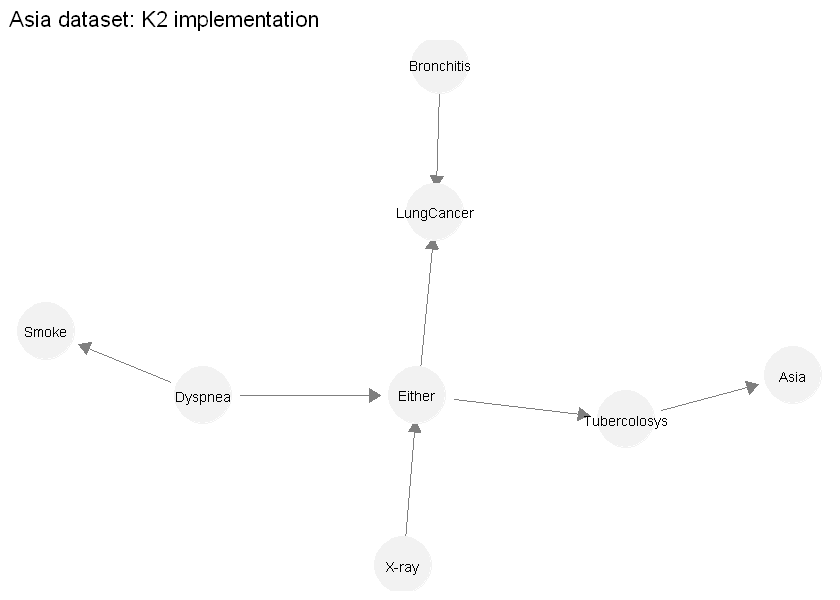

In [13]:
options(repr.plot.width=7, repr.plot.height=5)
plotGraph(adj, 16, 3, title='Asia dataset: K2 implementation')

`BNstruct`

In [14]:
df <- asia() # load it as BNDataset
df.bnlearn <- as.data.frame(raw.data(df))
cols <- variables(df)
colnames(df.bnlearn) <- cols
str(df.bnlearn)

'data.frame':	10000 obs. of  8 variables:
 $ Asia        : num  2 2 1 2 2 2 2 2 2 2 ...
 $ Tubercolosys: num  2 1 1 1 1 1 1 1 1 1 ...
 $ Smoke       : num  1 1 2 2 2 2 2 2 2 2 ...
 $ LungCancer  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Bronchitis  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Either      : num  2 1 1 1 1 1 1 1 1 1 ...
 $ X-ray       : num  1 2 2 2 1 2 2 1 1 2 ...
 $ Dyspnea     : num  2 1 1 1 2 2 2 2 2 1 ...


We try to learn the Asia database by employing all the possible algorithms and scoring functions provided in the package. In order to obtain more faithful results, the maximum number of parents is set to 2 and the layers of the nodes, i.e. their hierarchy, are given as input.

Network learning

In [15]:
net.1 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "mmhc") # Max Min Hill Climbing (default)

net.2 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "mmpc") # Max-Min Parent-and-Children 

net.3 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BDeu") # Bayesian-Dirichlet equivalent uniform (default)

net.4 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "AIC") # Akaike Information Criterion

net.5 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "hc",   # Hill Climbing
                       scoring.func = "BIC") # Bayesian Information Criterion

net.6 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "sm",   #  Silander-Myllymaki (exact search-and-score algorithm)
                        )

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: MMPC uses 'max.fanin', but apparently you set 'max.parents', changing accordingly.

bnstruct :: learning the structure using MMPC ...

bnstruct :: learning using MMPC completed.

bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: HC uses 'max.fanin' and 'layer.struct' parameters, but apparently you set 'max.parents' and 'max.parents.layers', changing accordingly.

bnstruct :: learning the structure using HC ...

bnstruct :: learning using HC completed.

bnstruct :: learning network parameters ... 

bnstruct :: paramete

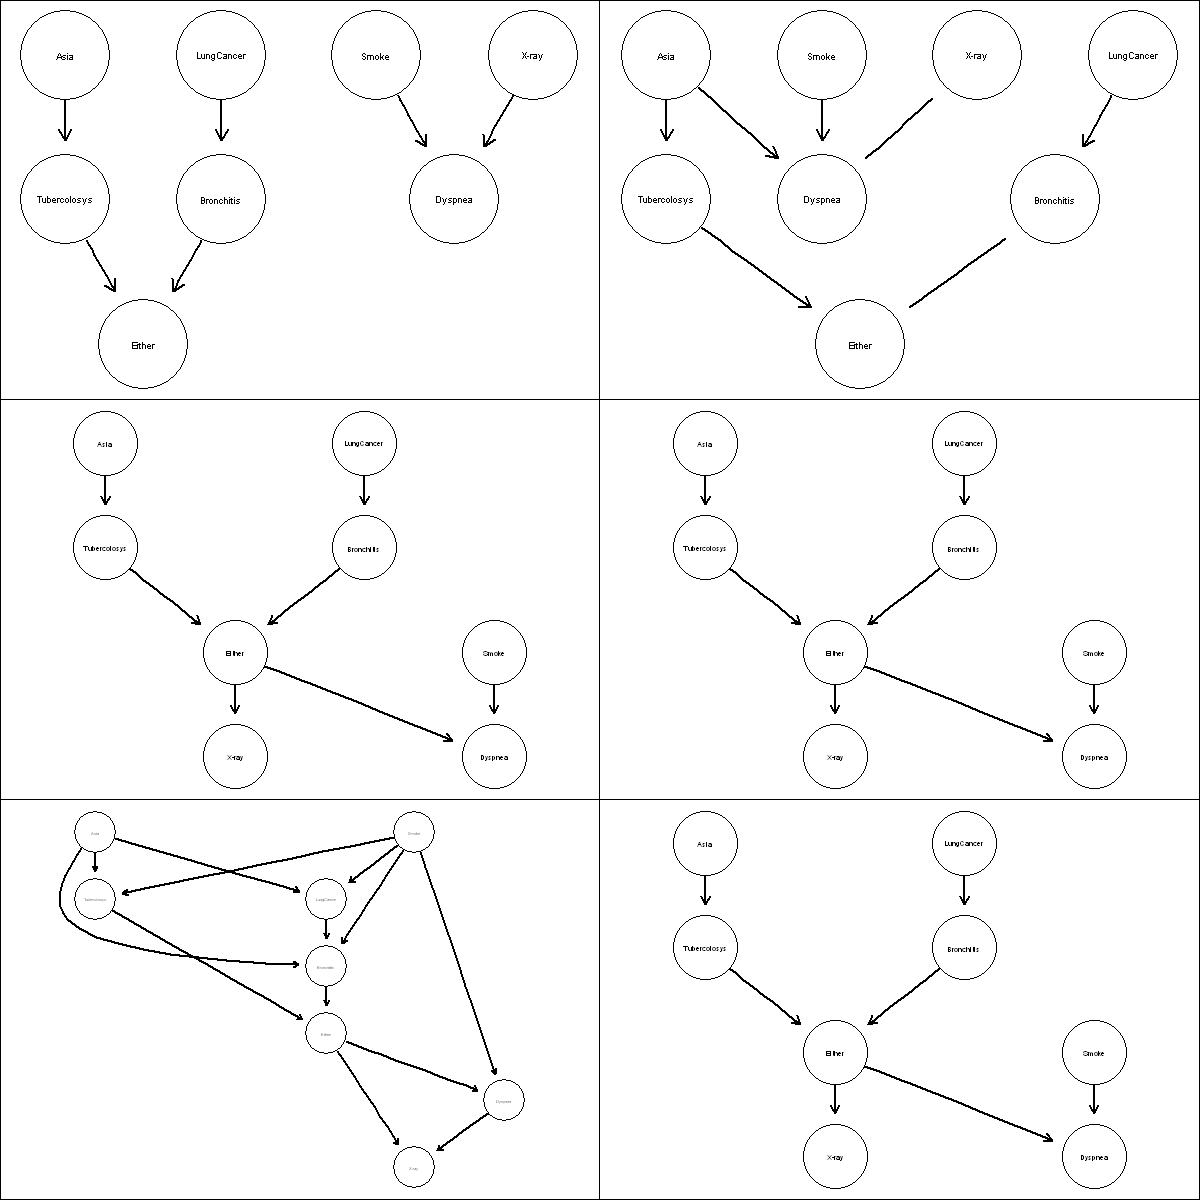

In [16]:
par(mfrow = c(3,2)) 
options(repr.plot.width=10, repr.plot.height=10)
for (i in c(net.1,net.2,net.3,net.4,net.5,net.6)){
    plot(i)
    box(which = "figure")
}

We can see 3 algorithms (the default Hill Climbing with BDeu or AIC and the Silander-Myllymaki exact search-and-score algorithm) are close to the result. 

We improve the Silander-Myllymaki exact search-and-score algorithm to compare with our network. 

In [17]:
bn.boot <- bootstrap(df, num.boots = 300)
net.bnstruct <- learn.network(bn.boot, bootstrap = TRUE, max.parents = 2, layering = level, algo = "sm")

bnstruct :: Generating bootstrap samples ...

bnstruct :: Bootstrap samples generated.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.



`BNlearn`

Learn the network structure

In [18]:
bn.k2 <- hc(df.bnlearn) 
bn.k2

ERROR while rich displaying an object: Error in matrix(c(x$d, x$pi, x$sigma, x$rho), ncol = 1): 'data' must be of a vector type, was 'NULL'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[

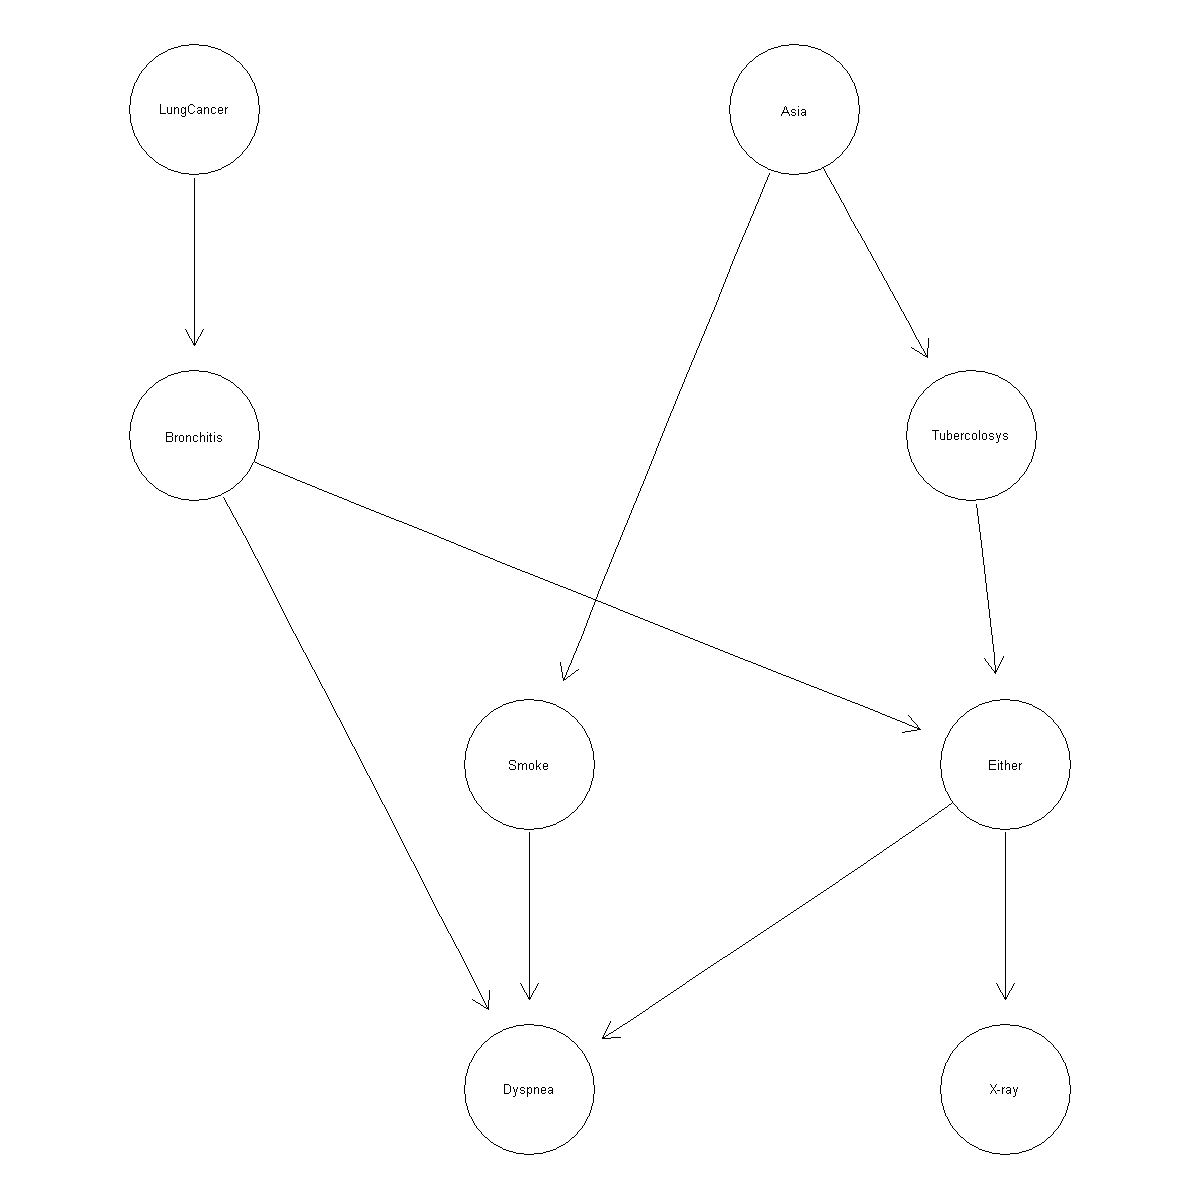

In [19]:
graphviz.plot(hc(df.bnlearn))

Compare our network with the Bnlearn and Bnstruct network

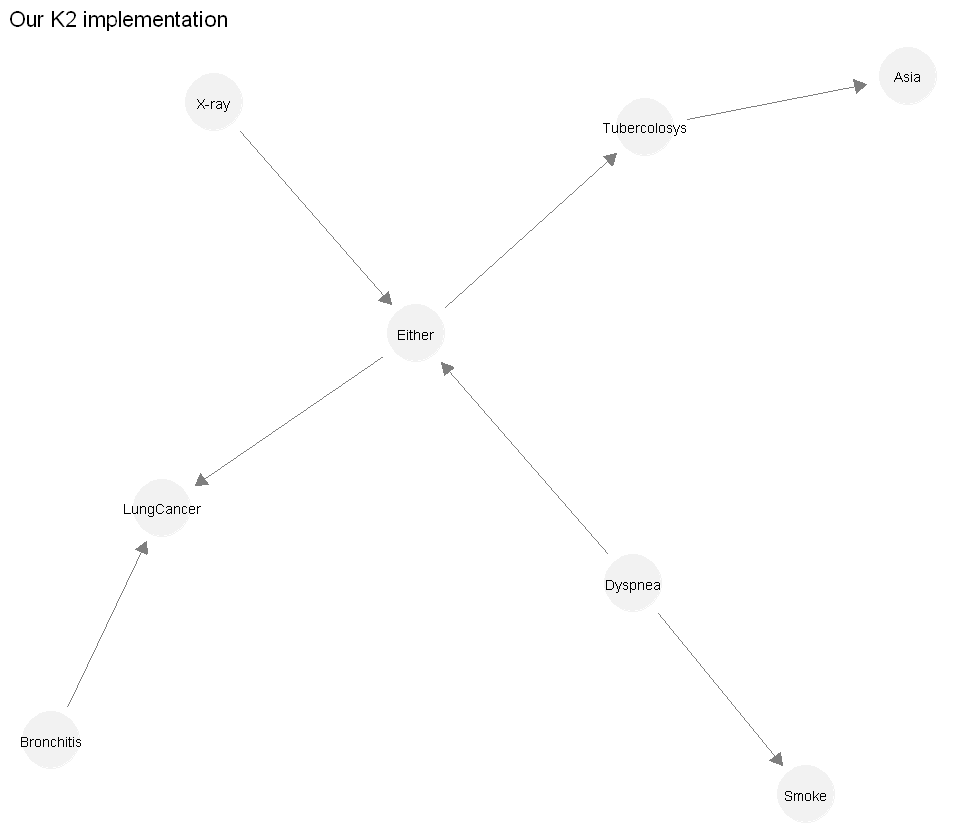

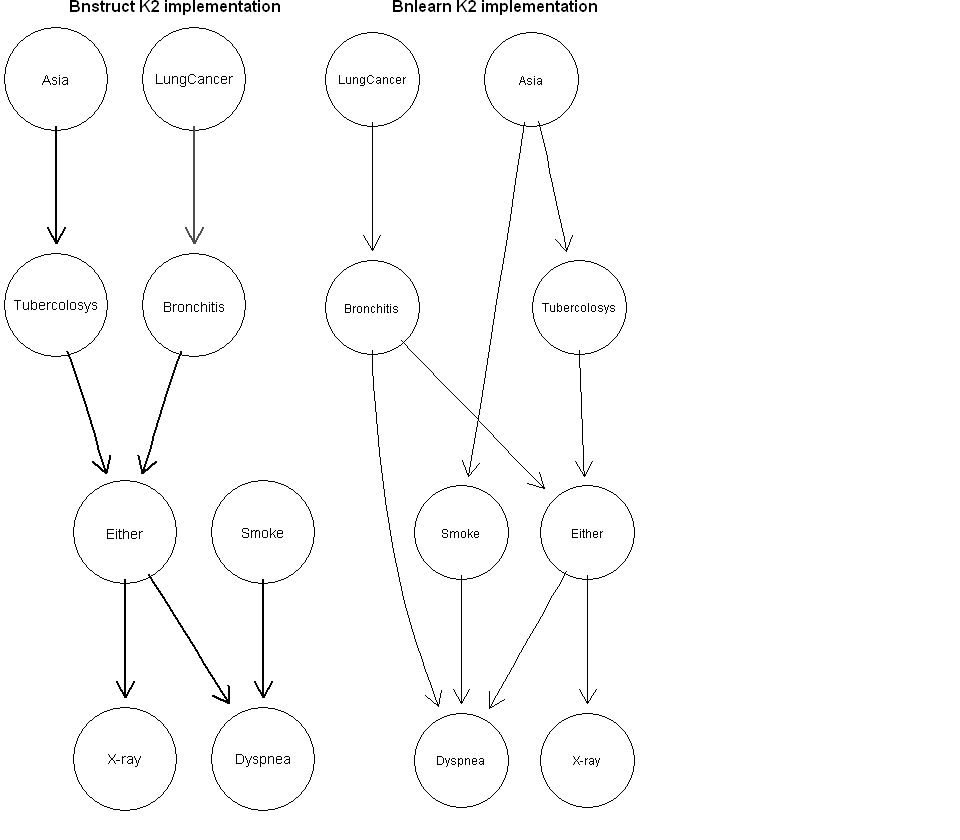

In [20]:
par(mfrow=c(1,3))
options(repr.plot.width=8, repr.plot.height=7)
plotGraph(adj, 16, 3, title='Our K2 implementation')
plot(net.bnstruct)
title("Bnstruct K2 implementation", line = 3.4)
graphviz.plot(hc(df.bnlearn))
title("Bnlearn K2 implementation", line = 3.4)

----------------------------------------------------------------------------------------------------------------------------

### Medium bnlearn network: CHILD

We now concentrate on the toy dataset Child, contained in the bnstruct library. It investigates the incidence and presentation of  possible diseases that would lead to a blue baby.

The node Disease includes six possible conditions, assumed mutually exclusive and exhaustive, that lead to particularly 'blue' babies. The graph represents, for example, that the level of oxygen in the lower body (LowerBodyO2) is directly related to the underlying level when breathing oxygen (HypoxiaInO2) and whether the hypoxia is equally distributed around the body (HypDistrib).



The number of nodes is equal to 20 and each node has a different cardinality.

As for what concerns the ordering of the nodes, it is taken from the image below:

![image](child.png)

In [21]:
df <- child()
data <- child()
data <- bnstruct::impute(data)
data <- as.data.frame(data@imputed.data)
data <- data %>% sapply(as.integer) %>% data.table
data <- data - 1

nodes <- c('BirthAsphysia', 'Disease', 'Age', 'LVH', 'DuctFlow', 'CardiacMixing', 'LungParench', 'LungFlow', 'Sick', 'HypDistrib',
           'Hypoxialn2', 'CO2', 'ChestXray', 'Grunting', 'LVHreport', 'LowewrBodyO2', 'RUQO2', 'CO2report', 'XrayReport', 'GuntingReport')
colnames(data) <- nodes
level <- c(1,2,4,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5)
head(data)

upbound <- 2
r_i <- r(data)
cat('r_i:\n\n',r_i)

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



BirthAsphysia,Disease,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick,HypDistrib,Hypoxialn2,CO2,ChestXray,Grunting,LVHreport,LowewrBodyO2,RUQO2,CO2report,XrayReport,GuntingReport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,2,1,0,2,0,0,1,0,0,0,0,1,1,1,2,1,0,1
1,3,1,0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1
1,2,0,1,0,2,0,1,1,0,1,1,1,1,1,0,1,0,1,1
1,3,0,0,0,2,0,0,1,0,2,0,0,1,0,2,0,0,0,1
1,1,0,1,1,3,0,0,0,0,2,0,0,1,1,0,0,0,1,1
1,1,0,1,0,3,0,2,1,0,2,0,2,1,1,1,0,0,2,1


r_i:

 2 6 3 2 3 4 3 3 2 2 3 3 5 2 2 3 3 2 5 2

In [22]:
start.time <- Sys.time()
level <-  c(1,2,4,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5)
adj   <- K2(nodes, level, upbound, data)
end.time <- Sys.time()
cat("-----------------------------------------------------------------------------------\n")
cat("K2 algorithm takes:",end.time - start.time,"sec \n")

Node:	 BirthAsphysia , Parents of: BirthAsphysia 	  :pi  1 = Ø 
Node:	 Disease , Parents of: Disease 	  :pi  2 = BirthAsphysia 
Node:	 Age , Parents of: Age 	  :pi  3 = Sick Disease 
Node:	 LVH , Parents of: LVH 	  :pi  4 = Disease 
Node:	 DuctFlow , Parents of: DuctFlow 	  :pi  5 = Disease 
Node:	 CardiacMixing , Parents of: CardiacMixing 	  :pi  6 = Disease 
Node:	 LungParench , Parents of: LungParench 	  :pi  7 = Disease 
Node:	 LungFlow , Parents of: LungFlow 	  :pi  8 = Disease 
Node:	 Sick , Parents of: Sick 	  :pi  9 = Disease 
Node:	 HypDistrib , Parents of: HypDistrib 	  :pi  10 = CardiacMixing DuctFlow 
Node:	 Hypoxialn2 , Parents of: Hypoxialn2 	  :pi  11 = LungParench CardiacMixing 
Node:	 CO2 , Parents of: CO2 	  :pi  12 = LungParench 
Node:	 ChestXray , Parents of: ChestXray 	  :pi  13 = LungParench LungFlow 
Node:	 Grunting , Parents of: Grunting 	  :pi  14 = Sick LungParench 
Node:	 LVHreport , Parents of: LVHreport 	  :pi  15 = Disease LVH 
Node:	 LowewrBodyO2 , Parent

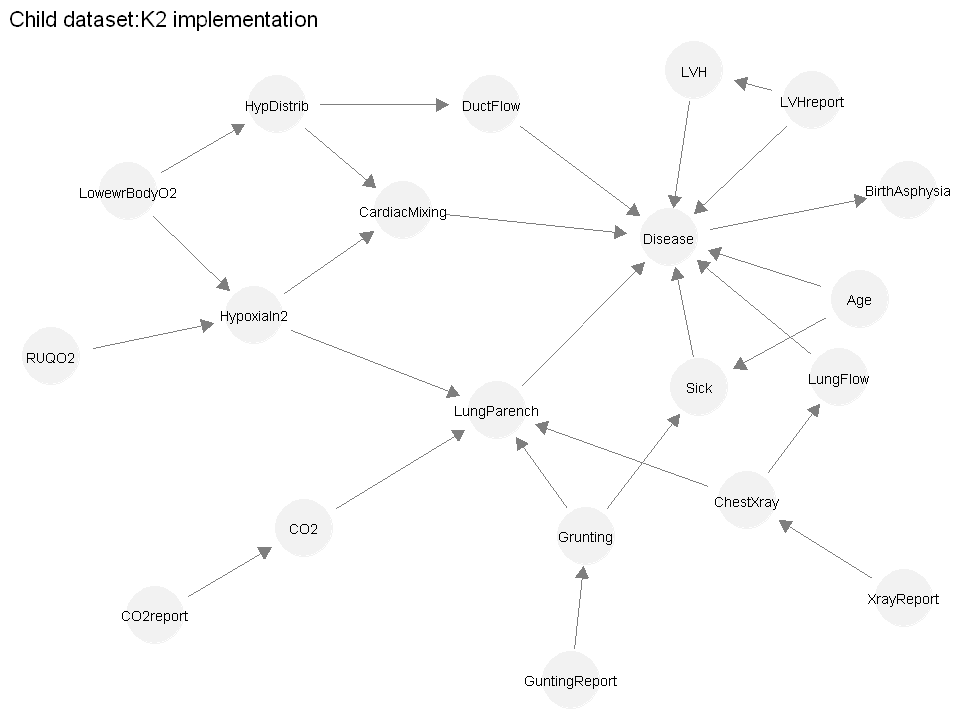

In [23]:
options(repr.plot.width=8, repr.plot.height=6)
plotGraph(adj, 16, 3, title='Child dataset:K2 implementation')

`BNstruct`

In [24]:
df.bnlearn <- as.data.frame(raw.data(df))
cols <- variables(df)
colnames(df.bnlearn) <- cols
df.bnlearn<−na.omit(df.bnlearn)
str(df.bnlearn)

'data.frame':	162 obs. of  20 variables:
 $ BirthAsphyxia : num  2 2 1 2 2 2 2 1 1 2 ...
 $ Disease       : num  3 4 2 2 3 2 2 3 2 3 ...
 $ Age           : num  2 1 3 1 2 1 1 3 1 1 ...
 $ LVH           : num  2 1 2 2 2 2 2 2 2 2 ...
 $ DuctFlow      : num  1 1 2 2 1 2 2 1 2 1 ...
 $ CardiacMixing : num  3 3 4 1 3 4 3 3 3 3 ...
 $ LungParench   : num  1 1 1 1 1 3 2 1 1 1 ...
 $ LungFlow      : num  2 3 3 3 2 3 3 2 3 2 ...
 $ Sick          : num  2 1 2 2 2 2 2 2 2 2 ...
 $ HypDistrib    : num  1 1 1 1 1 1 1 1 1 1 ...
 $ HypoxiaInO2   : num  2 2 3 1 3 3 3 2 2 3 ...
 $ CO2           : num  1 2 1 1 1 3 1 1 1 2 ...
 $ ChestXray     : num  2 3 3 3 1 4 3 3 3 2 ...
 $ Grunting      : num  2 2 2 2 1 1 2 2 2 2 ...
 $ LVHReport     : num  2 1 2 2 2 2 2 2 2 2 ...
 $ LowerBodyO2   : num  2 1 1 2 2 1 3 2 1 2 ...
 $ RUQO2         : num  3 1 2 3 2 2 3 2 1 1 ...
 $ CO2Report     : num  1 1 2 1 1 2 1 1 1 1 ...
 $ XrayReport    : num  2 3 1 1 1 4 3 2 5 1 ...
 $ GruntingReport: num  2 2 2 2 1 1 2 1 2 2 ...

Learning the network

In [25]:
net.1 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "mmhc") # Max Min Hill Climbing (default)
net.2 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "mmpc") # Max-Min Parent-and-Children 
#net.3 <- learn.network(df, max.parents = 3, layering = level,
#                       algo = "hc",   # Hill Climbing
#                       scoring.func = "BDeu") # Bayesian-Dirichlet equivalent uniform (default)
#net.4 <- learn.network(df, max.parents = 3, layering = level,
#                       algo = "hc",   # Hill Climbing
#                       scoring.func = "AIC") # Akaike Information Criterion
#net.5 <- learn.network(df, max.parents = 3, layering = level,
#                       algo = "hc",   # Hill Climbing
#                       scoring.func = "BIC") # Bayesian Information Criterion
net.6 <- learn.network(df, max.parents = 2, layering = level,
                       algo = "sm",   #  Silander-Myllymaki (exact search-and-score algorithm)
                        )

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.

bnstruct :: MMPC uses 'max.fanin', but apparently you set 'max.parents', changing accordingly.

bnstruct :: learning the structure using MMPC ...

bnstruct :: learning using MMPC completed.

bnstruct :: learning the structure using SM ...

bnstruct :: learning using SM completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



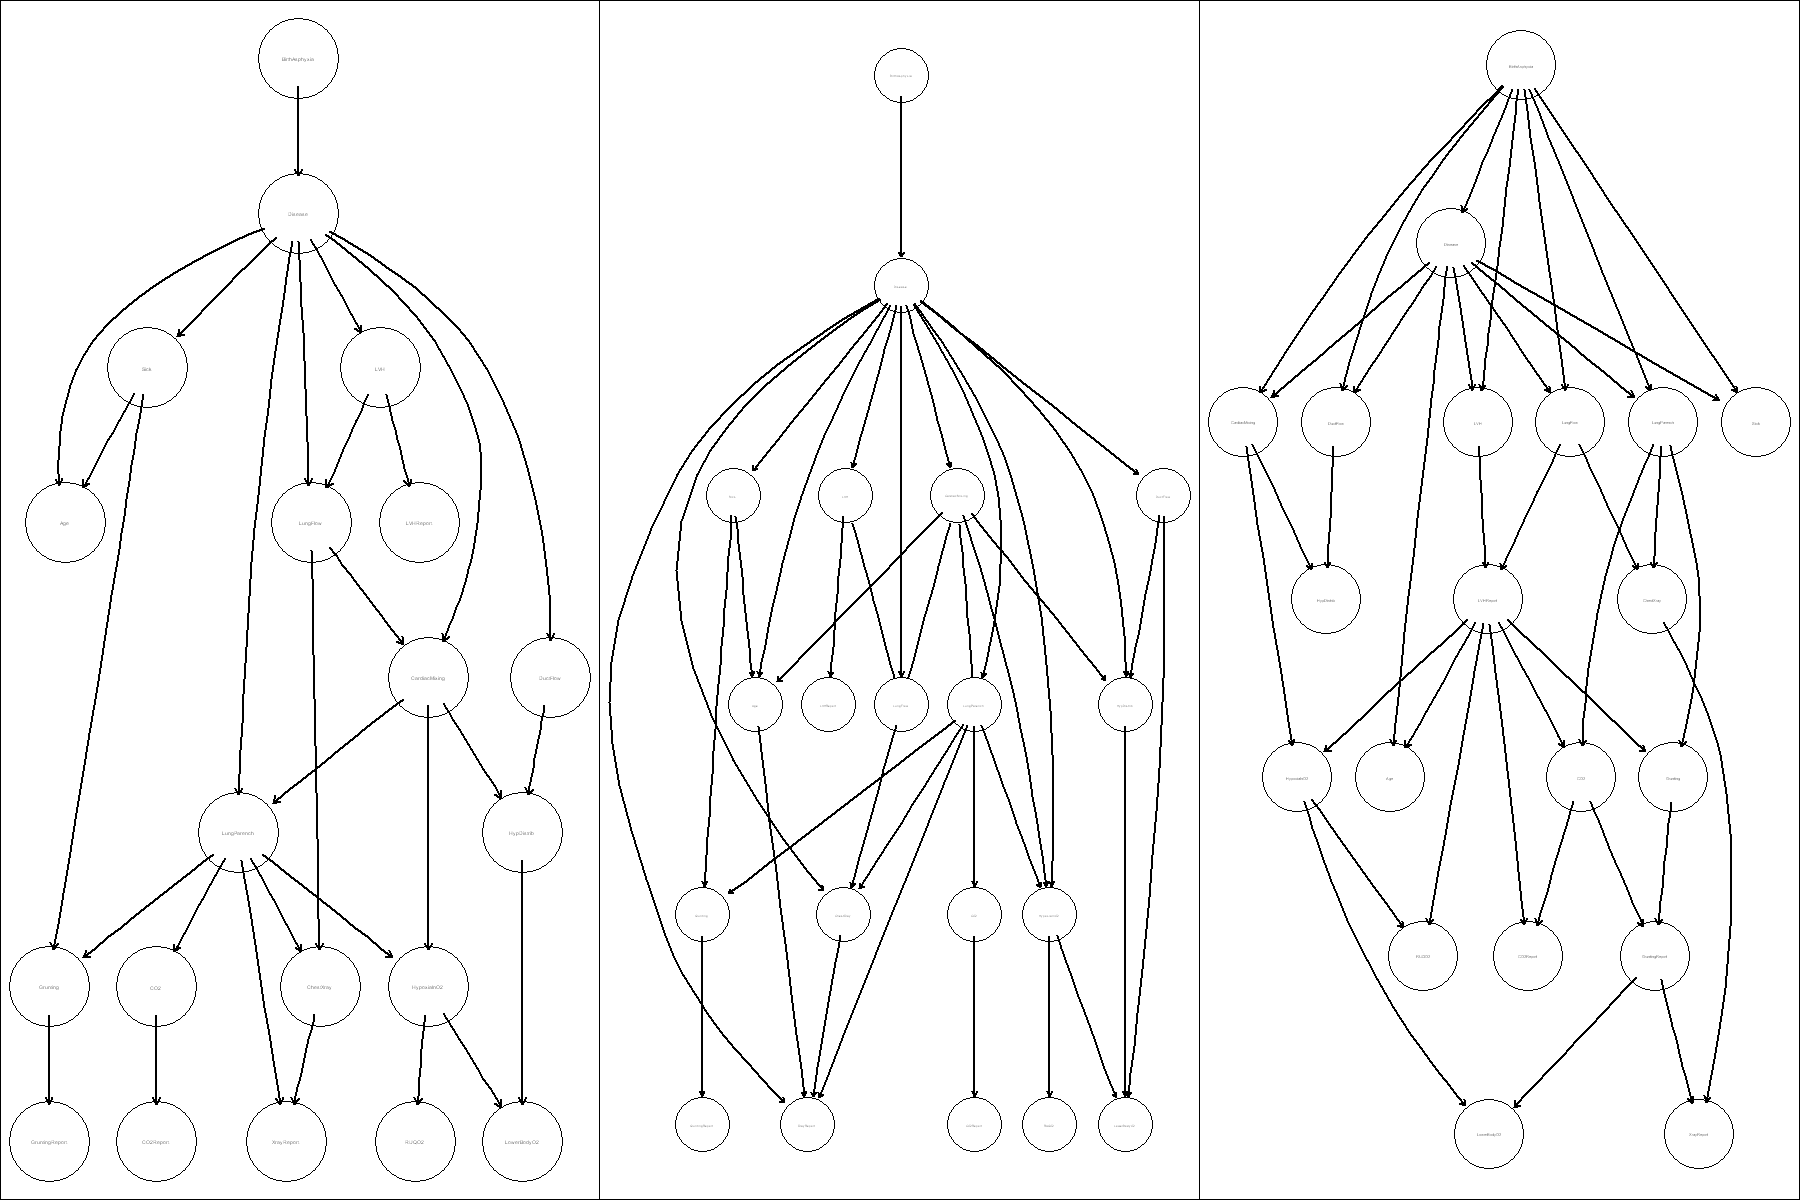

In [26]:
par(mfrow = c(1,3))
options(repr.plot.width=15, repr.plot.height=10)
for (i in c(net.1,net.2,net.6)){
    plot(i)
    box(which = "figure")
}

In [27]:
bn.boot <- bootstrap(df, num.boots = 1)
net.bnstruct <- learn.network(bn.boot, bootstrap = TRUE, max.parents = 2, layering = level, algo = "mmhc")


bnstruct :: Generating bootstrap samples ...

bnstruct :: Bootstrap samples generated.

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.



`BNlearn`

In [28]:
bn.k2 <- hc(df.bnlearn) 
bn.k2

ERROR while rich displaying an object: Error in matrix(c(x$d, x$pi, x$sigma, x$rho), ncol = 1): 'data' must be of a vector type, was 'NULL'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[

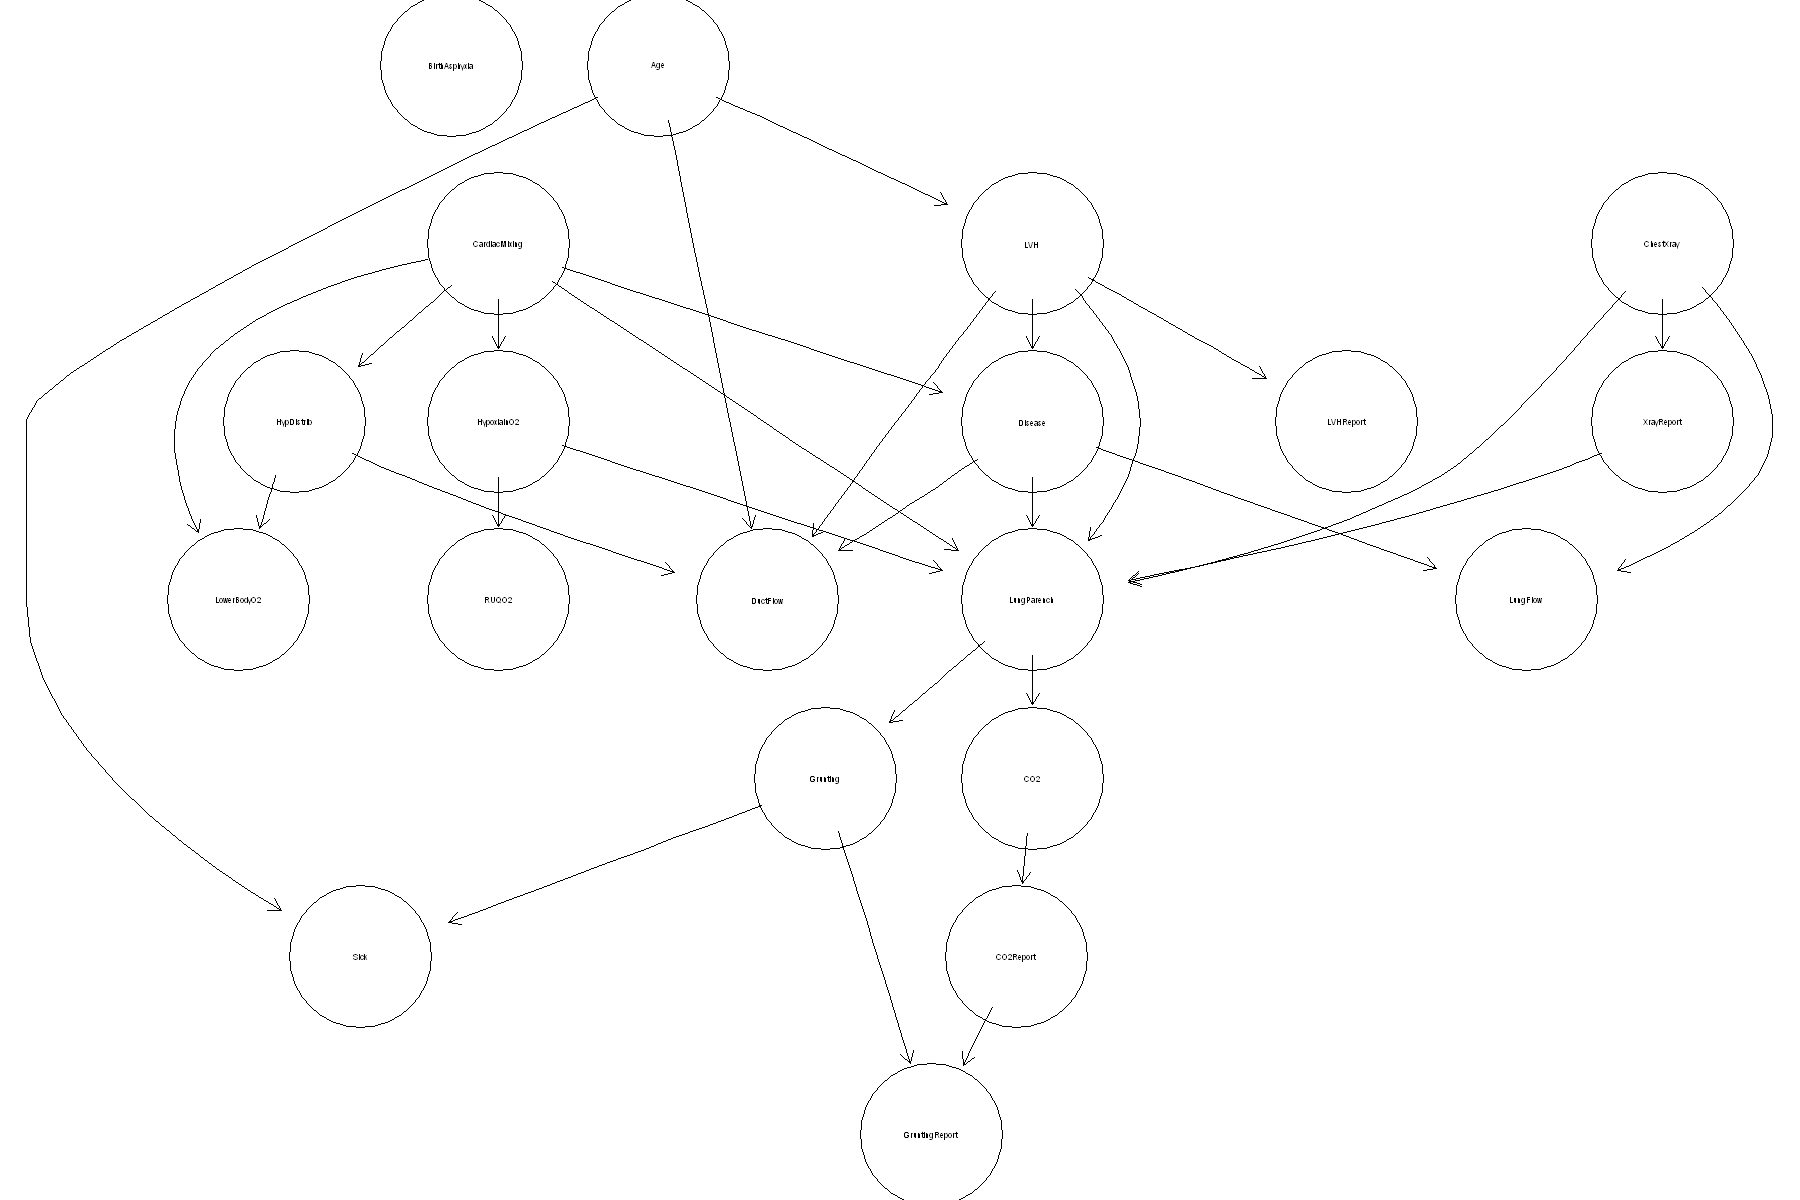

In [29]:
graphviz.plot(bn.k2)

Compare our network with the Bnlearn and Bnstruct network.

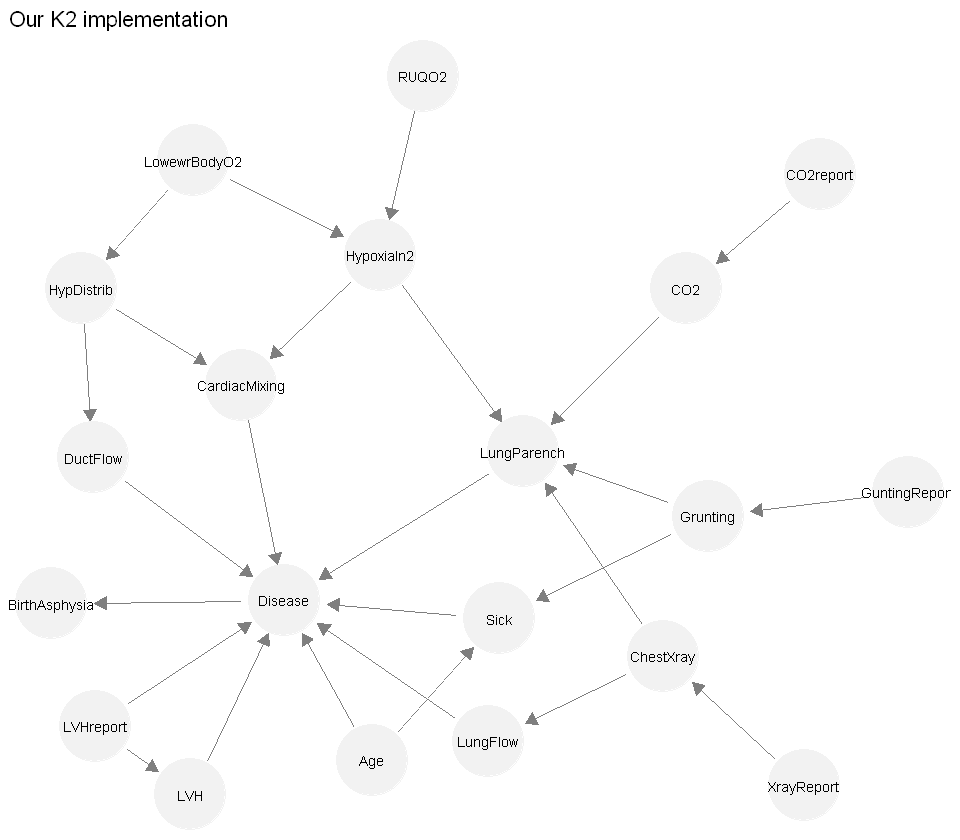

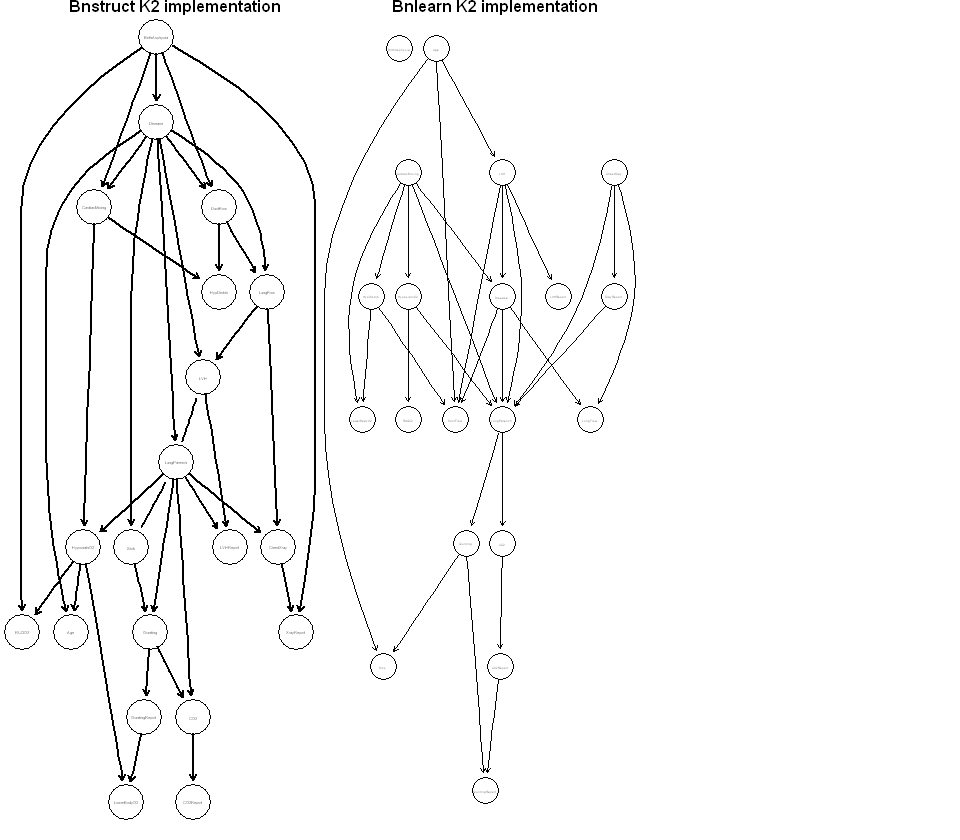

In [30]:
par(mfrow=c(1,3))
options(repr.plot.width=8, repr.plot.height=7)
plotGraph(adj, 20, 3, title='Our K2 implementation')
plot(net.bnstruct)
title("Bnstruct K2 implementation", line = 3.4)
graphviz.plot(hc(df.bnlearn))
title("Bnlearn K2 implementation", line = 3.4)

Our implementation of the K2 algorithm correctly predicts the example dataset used in Ruiz. The results for the bigger dataset Asia or Child do not perfectly match the real solution but still neither bnlearn and bnstruct packages methods do. 



-----------------------------------------------------------------------------------------------------------------------------

## Implementing K2 algorithm inside bnstruct R package

To implement the K2 algorithm inside a package, we can modify the download `bnstruct` package which is downloaded from CRAN repository. We will use __RStudio__ to construct the code inside `bnstruct` package. All relavent files are contained in R folder. With __RStudio__ open and modify the corresponding file, add the modify function and save them under the same name. Download the `devtools` library(`install.packages("devtools")`) and run it (`library('devtools')`). We will use the build function to create a single bundled `.tar` file from this updated package folder. We can use: `build(pkg='path1/package', path='~path2/package_new.tar', manual=FALSE, binary=FALSE)`. where path1 navigates to the place of the updated package folder and path2 says where the bundled package shall be stored. Install the updated package archive file in RStudio via. Finally, we can install the modified package `install.packages('~path2/package_name_new.tar', repos = NULL, type='source')`



